In [1]:
import tushare as ts
import time
import datetime
import sys
import os
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestRegressor
sys.path.append('../Codes')
import DataProcessor as DP
from DataProcessor import centralize

In [5]:
#获取行业分类
industrys = DP.get_industrys()

In [5]:
data = DP.get_daily_data(industry='801010.SI', fields=['open', 'close'])
OPEN = data['open']
CLOSE = data['close']

In [447]:
OPEN = data['open']
CLOSE = data['close']

#因子
ror = CLOSE / CLOSE.shift() - 1
r_rinei = CLOSE / OPEN - 1
r_geye = OPEN / CLOSE.shift() - 1

In [456]:
begin_train = '2017-01-01'
end_train = '2019-01-01'
begin_test = '2019-01-01'
end_test = '2021-01-01'

ror_train = ror.loc[(begin_train < ror.index) & (ror.index < end_train), :]
ror_test = ror.loc[(begin_test < ror.index) & (ror.index < end_test), :]
r_rinei_train = r_rinei.loc[(begin_train < r_rinei.index) & (r_rinei.index < end_train), :]
r_rinei_test = r_rinei.loc[(begin_test < r_rinei.index) & (r_rinei.index < end_test), :]
r_geye_train = r_geye.loc[(begin_train < r_geye.index) & (r_geye.index < end_train), :]
r_geye_test = r_geye.loc[(begin_test < r_geye.index) & (r_geye.index < end_test), :]

y_train = centralize(ror_train.rolling(5).sum().shift(-4) - r_geye_train)

x1_train = centralize(r_rinei_train.shift(1))
x2_train = centralize(r_rinei_train.rolling(2).mean().shift(2))
x3_train = centralize(r_rinei_train.rolling(2).mean().shift(4))
x4_train = centralize(r_rinei_train.rolling(5).mean().shift(6))
x5_train = centralize(r_rinei_train.rolling(10).mean().shift(11))
x6_train = centralize(r_rinei_train.rolling(20).mean().shift(21))
x7_train = centralize(r_rinei_train.rolling(20).mean().shift(41))

z1_train = centralize(r_geye_train.shift(1))
z2_train = centralize(r_geye_train.rolling(2).mean().shift(2))
z3_train = centralize(r_geye_train.rolling(2).mean().shift(4))
z4_train = centralize(r_geye_train.rolling(5).mean().shift(6))
z5_train = centralize(r_geye_train.rolling(10).mean().shift(11))
z6_train = centralize(r_geye_train.rolling(20).mean().shift(21))
z7_train = centralize(r_geye_train.rolling(20).mean().shift(41))

df_train = DataFrame({'y':y_train.values.flatten(),
               'x1':x1_train.values.flatten(),
               'x2':x2_train.values.flatten(),
               'x3':x3_train.values.flatten(),
               'x4':x4_train.values.flatten(),
               'x5':x5_train.values.flatten(),
               'x6':x6_train.values.flatten(),
               'x7':x7_train.values.flatten(),
               'z1':z1_train.values.flatten(),
               'z2':z2_train.values.flatten(),
               'z3':z3_train.values.flatten(),
               'z4':z4_train.values.flatten(),
               'z5':z5_train.values.flatten(),
               'z6':z6_train.values.flatten(),
               'z7':z7_train.values.flatten(),})

y_test = centralize(ror_test.rolling(5).sum().shift(-4) - r_geye_test)

x1_test = centralize(r_rinei_test.shift(1))
x2_test = centralize(r_rinei_test.rolling(2).mean().shift(2))
x3_test = centralize(r_rinei_test.rolling(2).mean().shift(4))
x4_test = centralize(r_rinei_test.rolling(5).mean().shift(6))
x5_test = centralize(r_rinei_test.rolling(10).mean().shift(11))
x6_test = centralize(r_rinei_test.rolling(20).mean().shift(21))
x7_test = centralize(r_rinei_test.rolling(20).mean().shift(41))

z1_test = centralize(r_geye_test.shift(1))
z2_test = centralize(r_geye_test.rolling(2).mean().shift(2))
z3_test = centralize(r_geye_test.rolling(2).mean().shift(4))
z4_test = centralize(r_geye_test.rolling(5).mean().shift(6))
z5_test = centralize(r_geye_test.rolling(10).mean().shift(11))
z6_test = centralize(r_geye_test.rolling(20).mean().shift(21))
z7_test = centralize(r_geye_test.rolling(20).mean().shift(41))

df_test = DataFrame({'y':y_test.values.flatten(),
               'x1':x1_test.values.flatten(),
               'x2':x2_test.values.flatten(),
               'x3':x3_test.values.flatten(),
               'x4':x4_test.values.flatten(),
               'x5':x5_test.values.flatten(),
               'x6':x6_test.values.flatten(),
               'x7':x7_test.values.flatten(),
               'z1':z1_test.values.flatten(),
               'z2':z2_test.values.flatten(),
               'z3':z3_test.values.flatten(),
               'z4':z4_test.values.flatten(),
               'z5':z5_test.values.flatten(),
               'z6':z6_test.values.flatten(),
               'z7':z7_test.values.flatten(),})

In [457]:
model = smf.ols('y~x1+x2+x3+x4+x5+z1+z2+z3+z4+z5', data=df_train).fit()
model.tvalues

Intercept     0.638005
x1          -12.077087
x2           -8.400220
x3           -4.233114
x4           -1.826153
x5          -10.275645
z1           -2.183889
z2           -3.162775
z3           -4.608429
z4           -6.765418
z5           -1.852582
dtype: float64

600831.SH    0.011246
000665.SZ    0.009323
000681.SZ    0.009117
300338.SZ    0.008625
600825.SH    0.008403
300251.SZ    0.007867
300431.SZ    0.007429
300027.SZ    0.007305
300336.SZ    0.007095
002858.SZ    0.007054
Name: 2020-07-01 00:00:00, dtype: float64


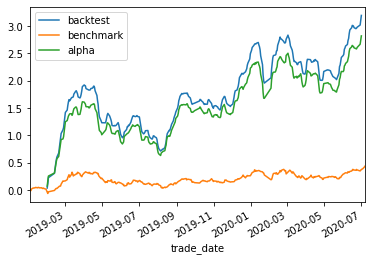

In [458]:
y_hat = DataFrame(model.predict(df_test).values.reshape(len(ror_test), len(industry[i])), index=ror_test.index, columns=ror_test.columns)
position = (y_hat.gt(y_hat.quantile(0.9, 1), 0))
ror_huice = position * (ror_test.rolling(5).sum().shift(-4) - r_geye_test)
ror_huice[ror_huice==0] = np.nan
ror_huice.mean(1).cumsum().plot()
ror_test.mean(1).cumsum().plot()
(ror_huice.mean(1).cumsum() - ror_test.mean(1).cumsum()).plot()
plt.legend(['backtest', 'benchmark', 'alpha'])
print(y_hat.iloc[-5,:].sort_values(ascending=False).dropna().iloc[:10])

In [459]:
x1_test = centralize(r_rinei_test)
x2_test = centralize(r_rinei_test.rolling(2).mean().shift(1))
x3_test = centralize(r_rinei_test.rolling(2).mean().shift(3))
x4_test = centralize(r_rinei_test.rolling(5).mean().shift(5))
x5_test = centralize(r_rinei_test.rolling(10).mean().shift(10))
x6_test = centralize(r_rinei_test.rolling(20).mean().shift(20))
x7_test = centralize(r_rinei_test.rolling(20).mean().shift(40))

z1_test = centralize(r_geye_test)
z2_test = centralize(r_geye_test.rolling(2).mean().shift(1))
z3_test = centralize(r_geye_test.rolling(2).mean().shift(3))
z4_test = centralize(r_geye_test.rolling(5).mean().shift(5))
z5_test = centralize(r_geye_test.rolling(10).mean().shift(10))
z6_test = centralize(r_geye_test.rolling(20).mean().shift(20))
z7_test = centralize(r_geye_test.rolling(20).mean().shift(40))

df_test = DataFrame({'y':y_test.values.flatten(),
               'x1':x1_test.values.flatten(),
               'x2':x2_test.values.flatten(),
               'x3':x3_test.values.flatten(),
               'x4':x4_test.values.flatten(),
               'x5':x5_test.values.flatten(),
               'x6':x6_test.values.flatten(),
               'x7':x7_test.values.flatten(),
               'z1':z1_test.values.flatten(),
               'z2':z2_test.values.flatten(),
               'z3':z3_test.values.flatten(),
               'z4':z4_test.values.flatten(),
               'z5':z5_test.values.flatten(),
               'z6':z6_test.values.flatten(),
               'z7':z7_test.values.flatten(),})
y_hat = DataFrame(model.predict(df_test).values.reshape(len(ror_test), len(industry[i])), index=ror_test.index, columns=ror_test.columns)
print(y_hat.iloc[-1,:].sort_values(ascending=False).dropna().iloc[:20])

600634.SH    0.010829
002247.SZ    0.009492
000673.SZ    0.008508
300426.SZ    0.008051
300182.SZ    0.007536
002354.SZ    0.007476
002447.SZ    0.007039
600892.SH    0.006903
002027.SZ    0.006018
002445.SZ    0.005927
600652.SH    0.005823
002502.SZ    0.005405
600158.SH    0.005373
000665.SZ    0.004386
300269.SZ    0.004365
300242.SZ    0.004352
600831.SH    0.004319
000892.SZ    0.004266
002659.SZ    0.004124
600386.SH    0.004064
Name: 2020-07-07 00:00:00, dtype: float64


In [460]:
y_hat.iloc[-1,:].loc['000802.SZ']

-0.0004997529199636643

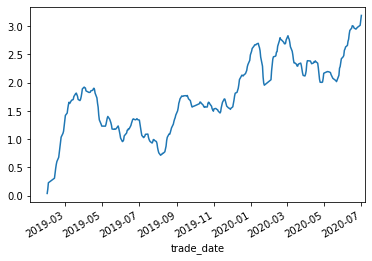

In [463]:
ror_huice.mean(1).cumsum().plot()

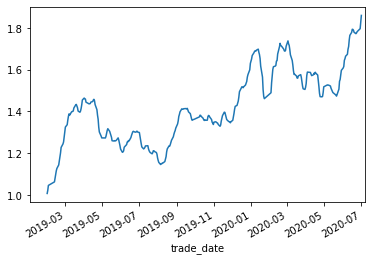

In [465]:
(ror_huice.mean(1)/5+1).cumprod().plot()